In [1]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset information**

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [8]:
df['Class'].value_counts() ##dataset is imbalanced as 0 count is >>1 count 

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

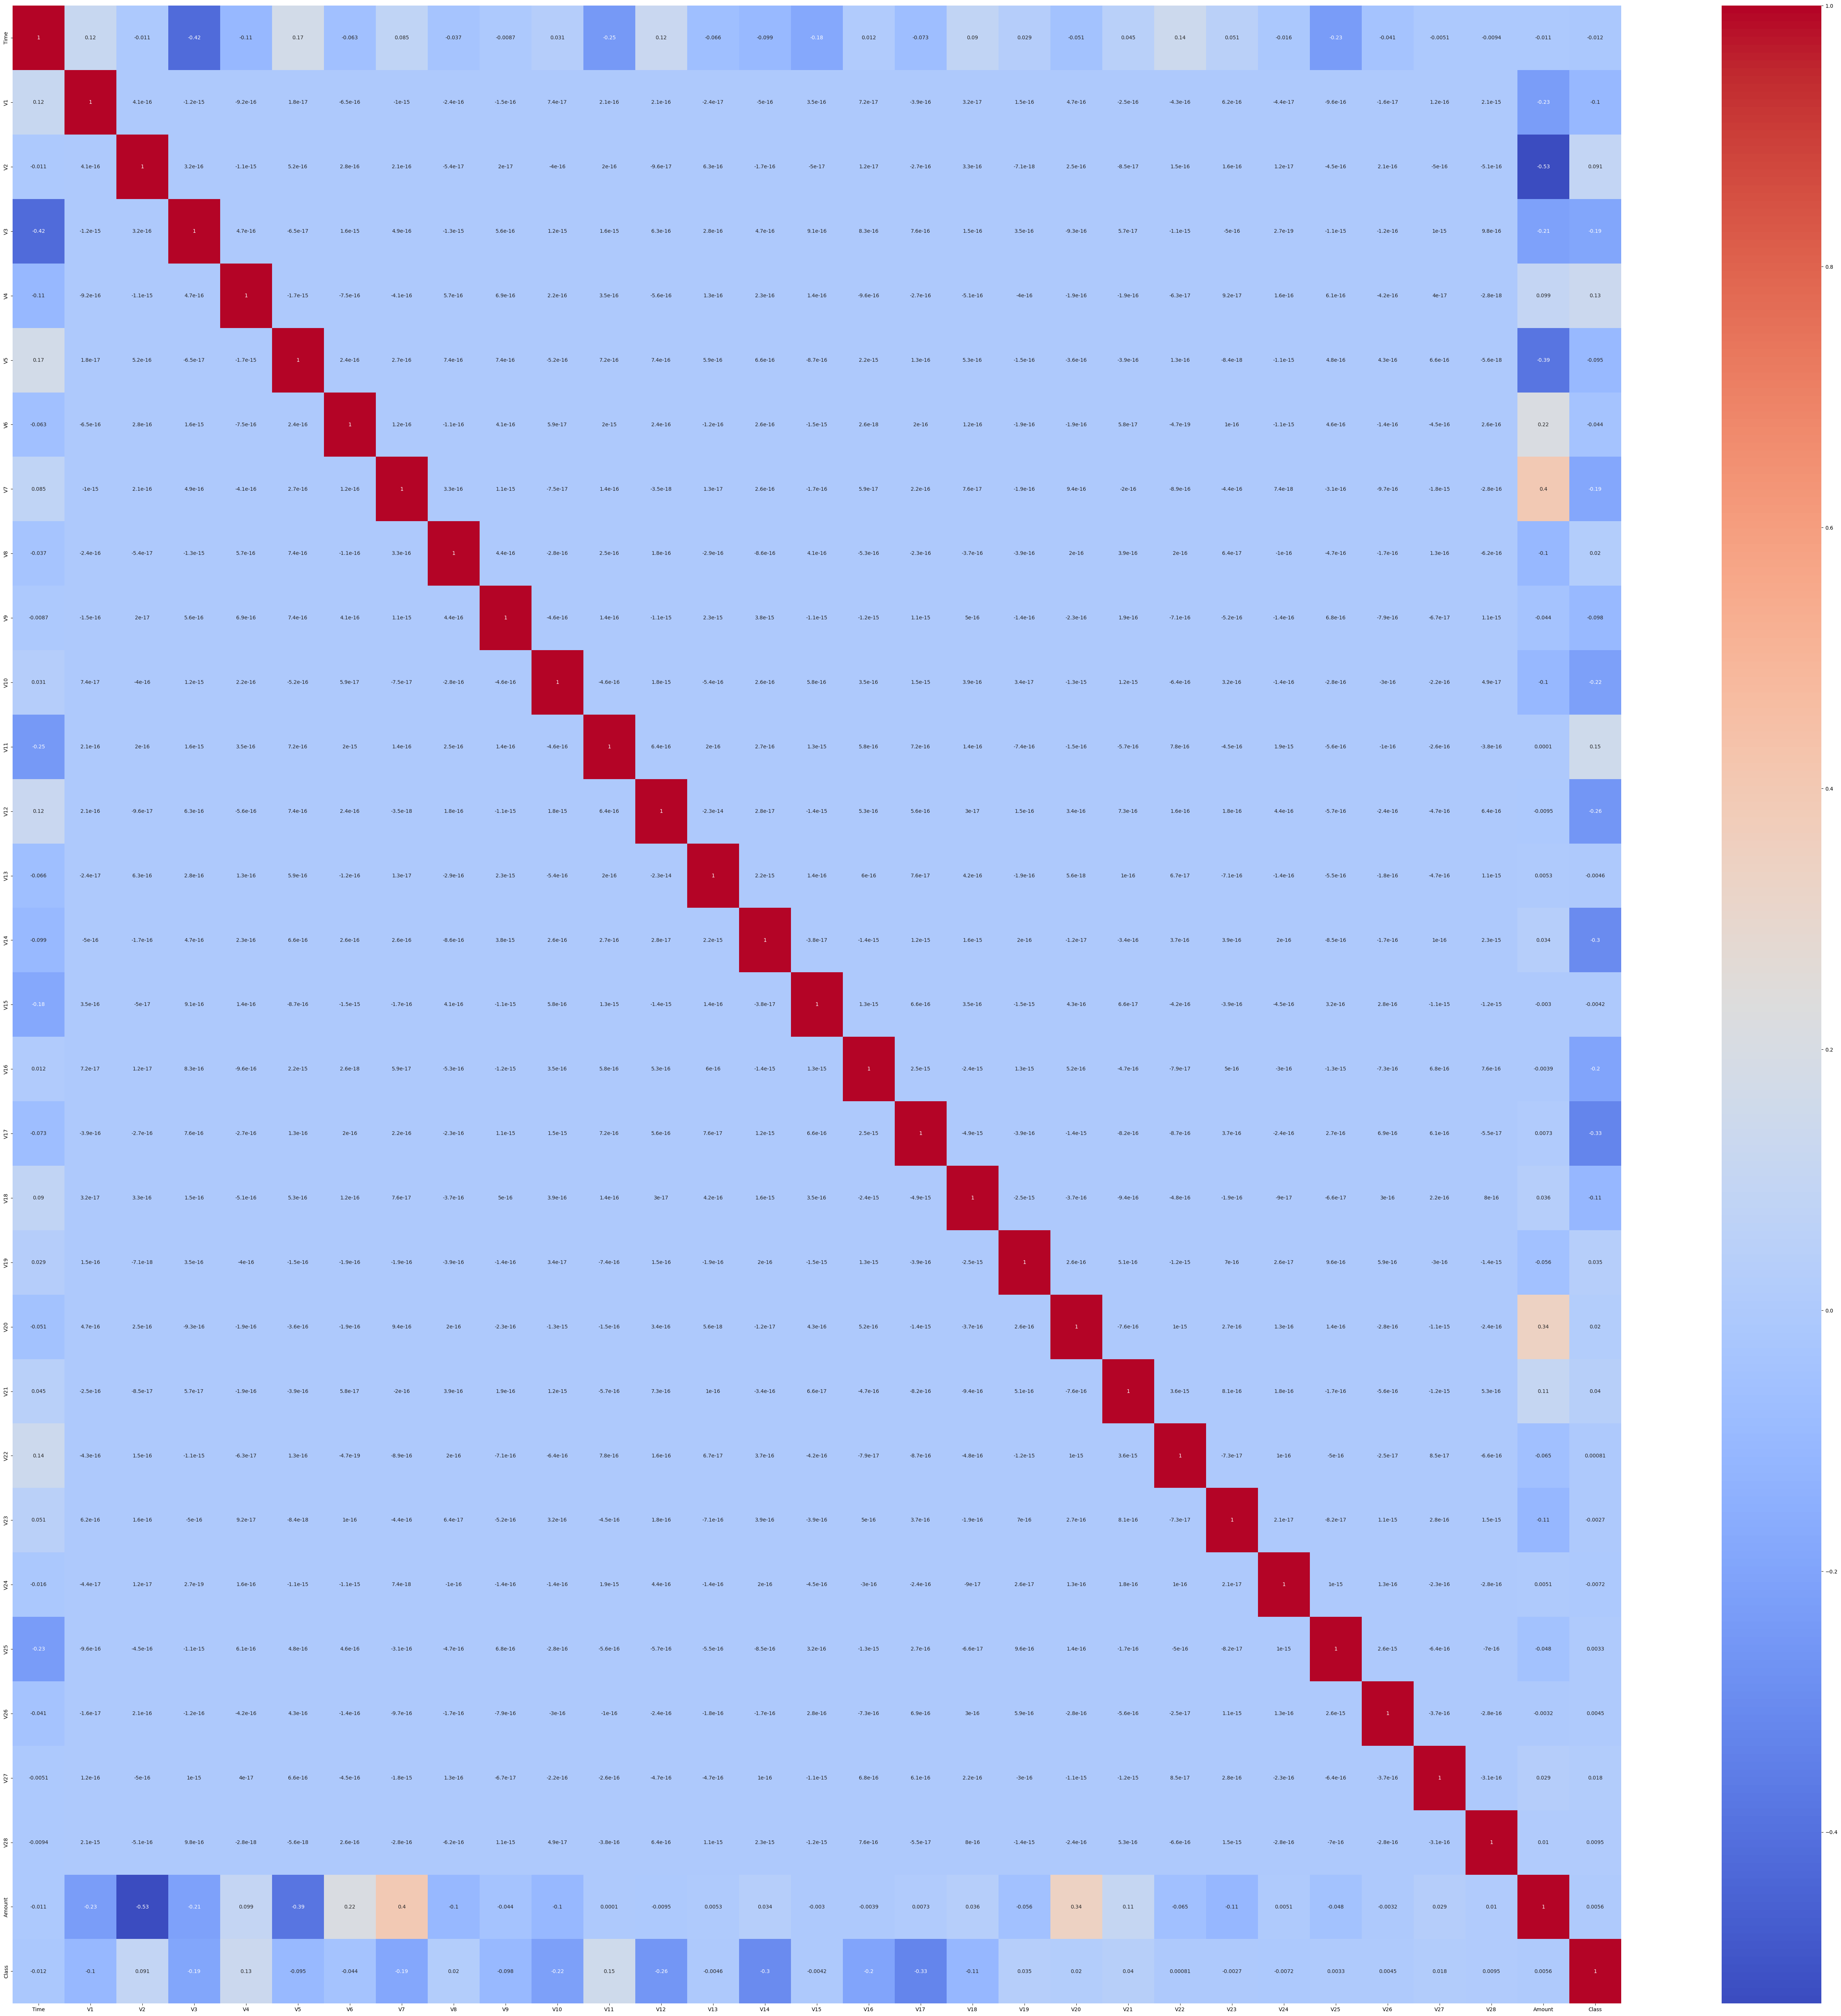

In [9]:
plt.figure(figsize=(70,70))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

<Axes: xlabel='Class'>

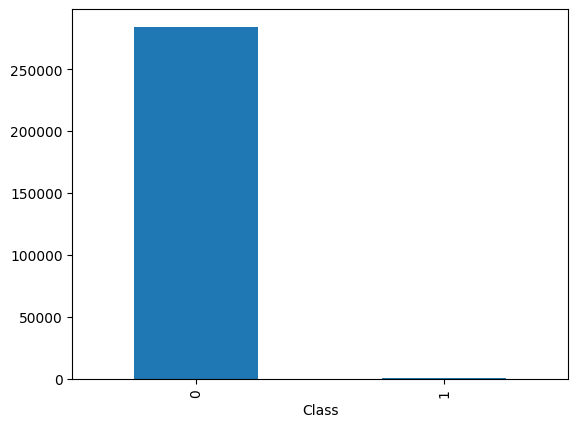

In [10]:
df['Class'].value_counts().plot(kind="bar")

In [11]:
legit=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
legit["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**UNDER SAMPLING**

As the data is imbalanced in order to make the no of legit distributions equal to fraud distributions we use the method of under sampling

In [16]:
legit_sample=legit.sample(n=492)

now concatenate both dataframe

In [17]:
df_new=pd.concat([legit_sample,fraud],axis=0)

In [18]:
df_new["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<Axes: xlabel='Class'>

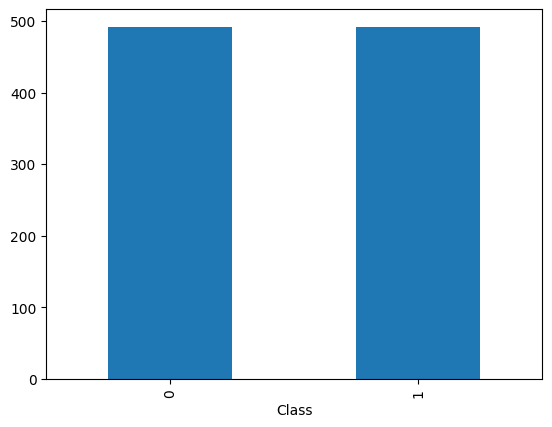

In [19]:
df_new["Class"].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

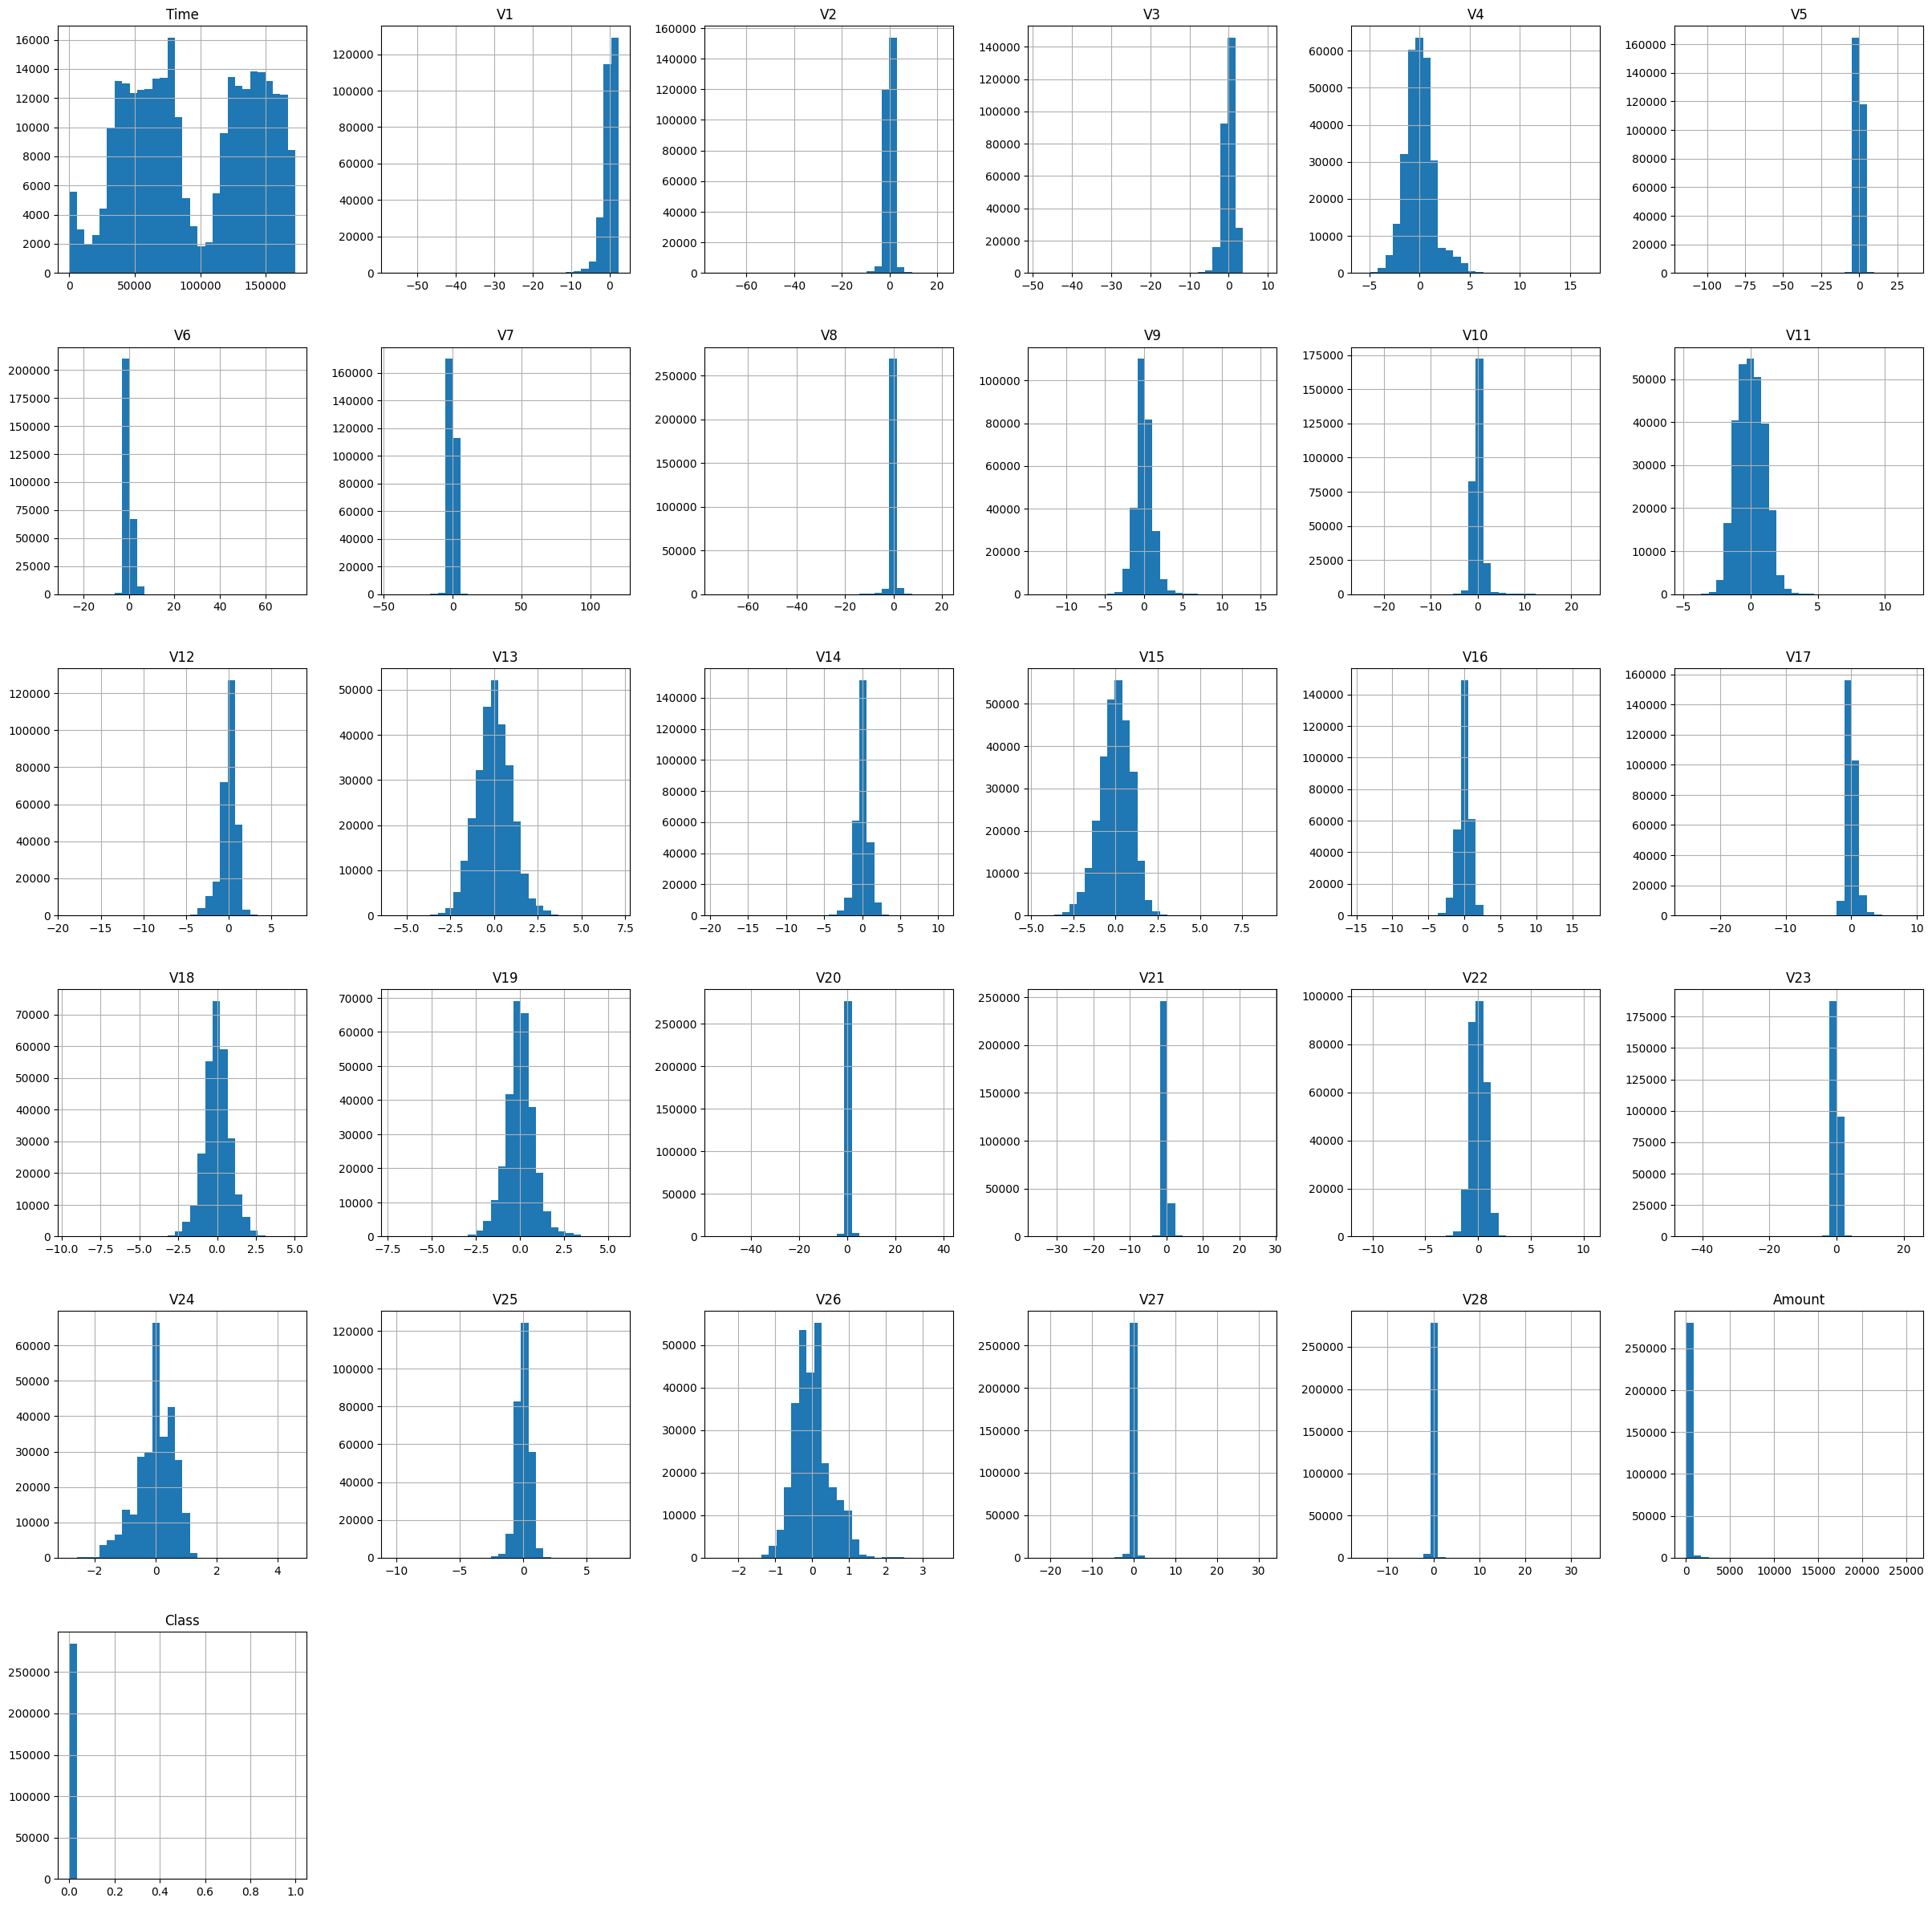

In [20]:
df.hist(bins=30,figsize=(30,30))

In [21]:
df_new.groupby("Class").mean() ##difference is still present so the sample is good

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92093.581301,0.059308,0.005622,0.034039,0.129841,-0.068127,0.000182,0.047058,0.027651,0.008210,...,0.008162,-0.008886,-0.024066,0.014126,-0.007077,0.016964,-0.015235,-0.034966,-0.013215,95.100285
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
X=df_new.iloc[:,:-1]

In [23]:
y=df_new.iloc[:,-1]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [25]:
print(X_train.shape)
print(X_test.shape)


(787, 30)
(197, 30)


In [26]:
model1=DecisionTreeClassifier()
model2=RandomForestClassifier()
model3=LogisticRegression()

In [27]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=model1.predict(X_test)

In [29]:
print(accuracy_score(y_test,y_pred))

0.883248730964467


**Here we have handeled the imbalanced data so accuracy score can be a correct matrix to verify the performance of the model yet confusion_matrix
and classification_report matrix give us the clear picture of the accuracy and performance of the model**

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[88 11]
 [12 86]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        99
           1       0.89      0.88      0.88        98

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



[Text(0.3766025641025641, 0.9642857142857143, 'x[14] <= -1.771\ngini = 0.5\nsamples = 787\nvalue = [393, 394]'),
 Text(0.11538461538461539, 0.8928571428571429, 'x[14] <= -2.698\ngini = 0.054\nsamples = 357\nvalue = [10, 347]'),
 Text(0.05128205128205128, 0.8214285714285714, 'x[12] <= 0.375\ngini = 0.012\nsamples = 336\nvalue = [2, 334]'),
 Text(0.02564102564102564, 0.75, 'gini = 0.0\nsamples = 334\nvalue = [0, 334]'),
 Text(0.07692307692307693, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1794871794871795, 0.8214285714285714, 'x[6] <= -0.616\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(0.1282051282051282, 0.75, 'x[29] <= 103.345\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.10256410256410256, 0.6785714285714286, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.15384615384615385, 0.6785714285714286, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23076923076923078, 0.75, 'x[28] <= -0.198\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.2051282

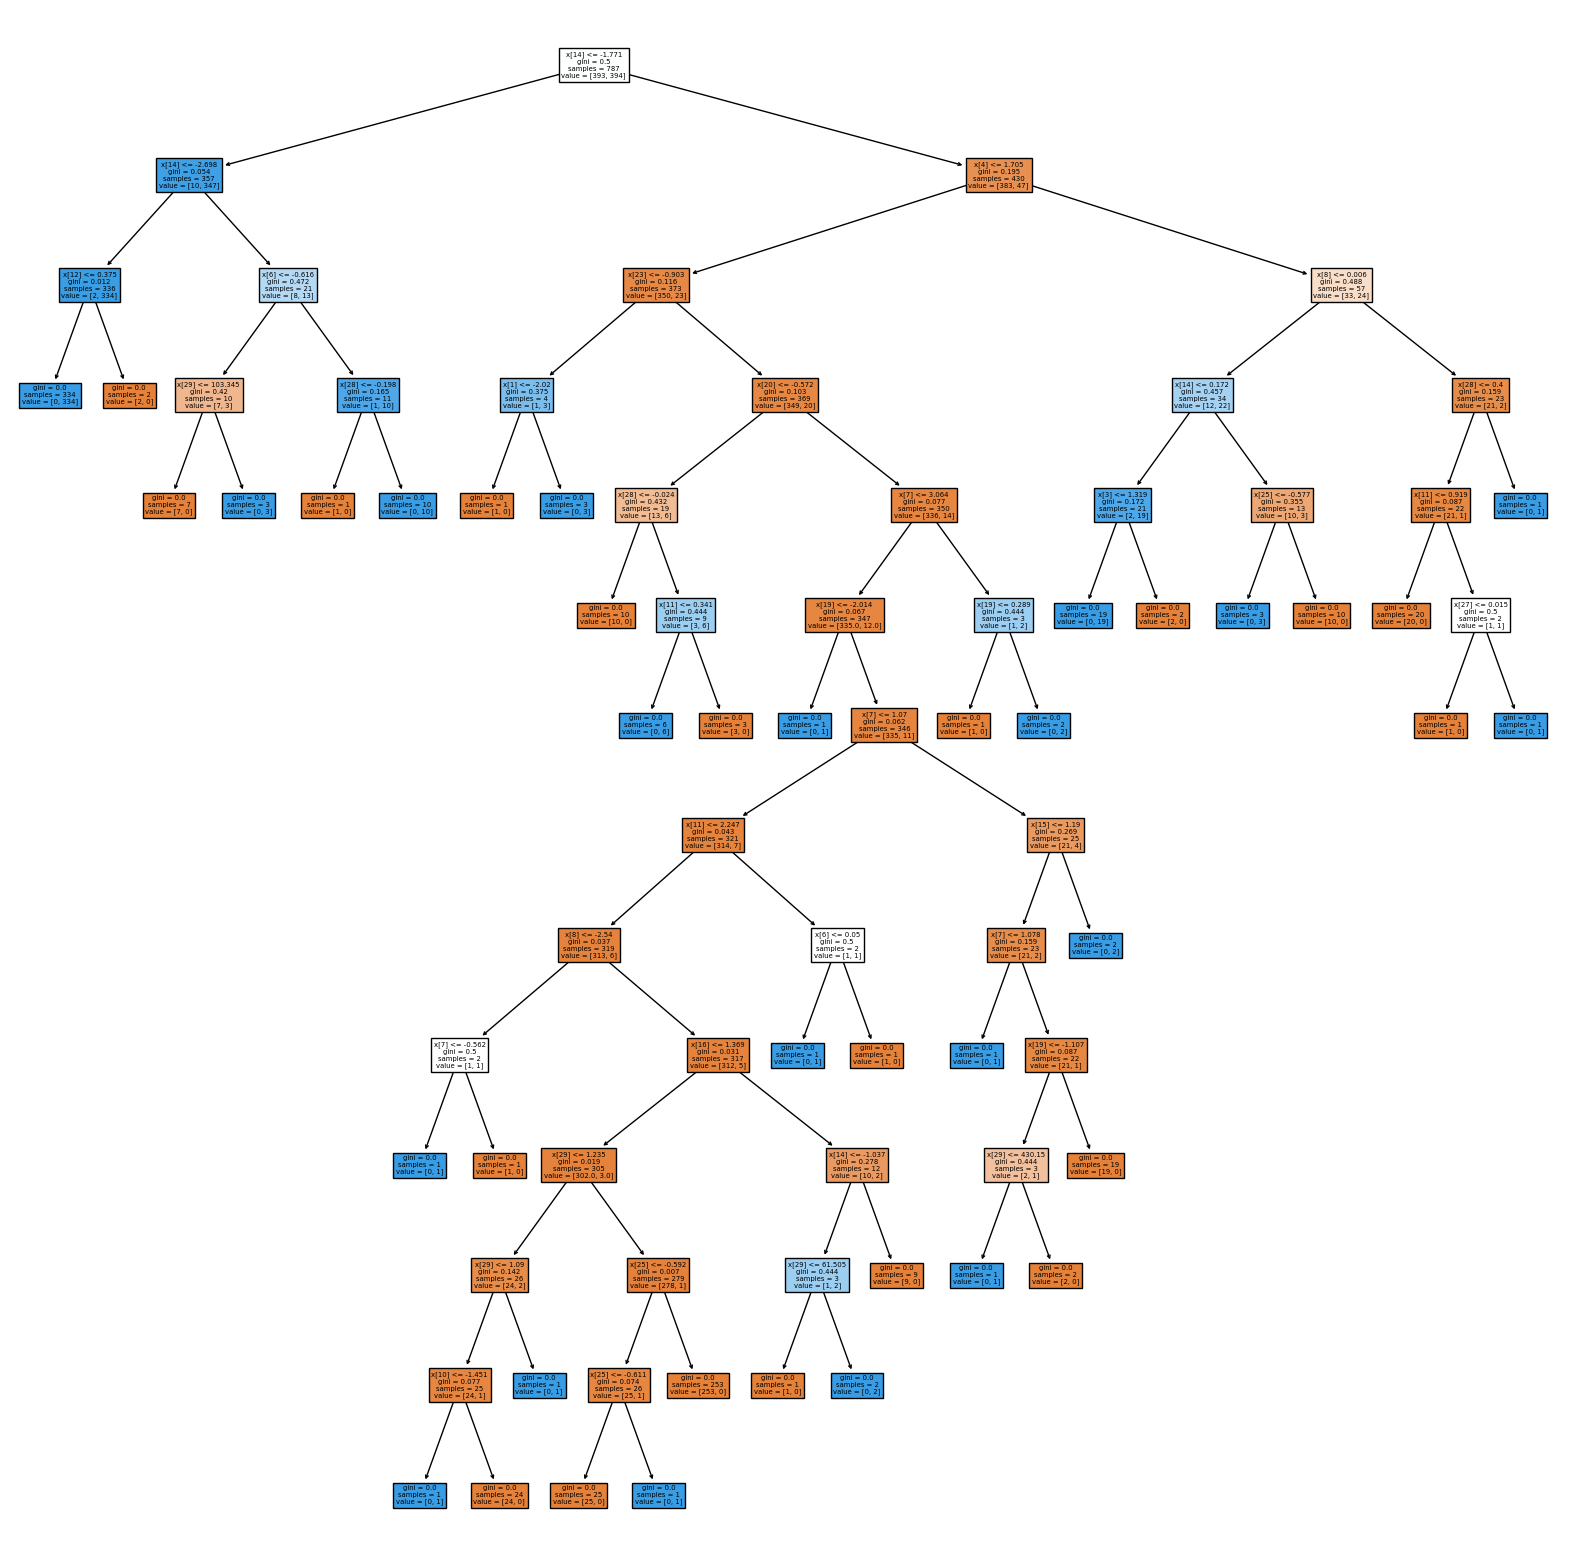

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model1,filled=True)

In [32]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred1=model2.predict(X_test)

In [34]:
print(accuracy_score(y_test,y_pred1))

0.9187817258883249


In [35]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[96  3]
 [13 85]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [36]:
model3.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred2=model3.predict(X_test)

In [38]:
print(accuracy_score(y_test,y_pred2))

0.949238578680203


In [39]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[96  3]
 [ 7 91]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.97      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [40]:
estimators_=[('first',model1),("second",model2),("third",model3)]
model4=VotingClassifier(estimators=estimators_,voting="soft")

In [41]:
model4.fit(X_train,y_train)

VotingClassifier(estimators=[('first', DecisionTreeClassifier()),
                             ('second', RandomForestClassifier()),
                             ('third', LogisticRegression())],
                 voting='soft')

In [42]:
y_pred3=model4.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_pred3))

0.9238578680203046


In [44]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[96  3]
 [12 86]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [45]:
data={"DecisionTreeClassifier()":{"accuracy_score":0.9035532994923858,},
     "RandomForestClassifier()":{"accuracy_score":0.9187817258883249},
     "LogisticRegression()":{"accuracy_score":0.9137055837563451},
     "VotingClassifier()":{"accuracy_score":0.934010152284264}}
pd.DataFrame(data)

,DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),VotingClassifier()
accuracy_score,0.903553,0.918782,0.913706,0.93401
